In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras.callbacks import EarlyStopping

In [ ]:
#Importing MNIST dataset from tensorflow keras
(trainval_x, trainval_y), (test_x, test_y) = tensorflow.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


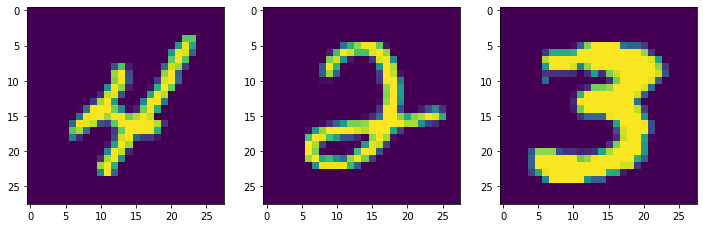

In [ ]:
#Plotting certain images from the dataset
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
axes[0].imshow(trainval_x[9])
axes[1].imshow(trainval_x[16])
axes[2].imshow(trainval_x[27])
plt.show()

In [ ]:
#Converting the data from utf-8 format to float format
trainval_x = np.float32(trainval_x)
trainval_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
#Converting the test data from utf-8 format to float format
test_x = np.float32(test_x)
test_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
#Flattenning the list of images to create a long array of 784 numbers 
trainval_x_flat = []
for i in range(len(trainval_x)):
  trainval_x_flat.append([y for x in trainval_x[i] for y in x])

In [ ]:
#Converting flat list array to numpy array
trainval_x_flat = np.array(trainval_x_flat)
trainval_x_flat.shape

(60000, 784)

###**Reducing the data dimensionality**

In [ ]:
#Taking PCA dimensionality reduction for upto 700 components
from sklearn.decomposition import PCA
pca_test = PCA(n_components=700, svd_solver = 'randomized', random_state=42)
pca_test.fit(trainval_x_flat)

pca_test.explained_variance_ratio_

array([9.70479771e-02, 7.09602460e-02, 6.16918243e-02, 5.38949445e-02,
       4.86886539e-02, 4.31229249e-02, 3.27197909e-02, 2.88393572e-02,
       2.76207067e-02, 2.35703420e-02, 2.10922118e-02, 2.02302039e-02,
       1.71584412e-02, 1.69213694e-02, 1.57866497e-02, 1.48297418e-02,
       1.32458089e-02, 1.27691645e-02, 1.18728103e-02, 1.15270037e-02,
       1.06618134e-02, 1.00672767e-02, 9.53586679e-03, 9.12556797e-03,
       8.83417204e-03, 8.39331374e-03, 8.12590215e-03, 7.86377396e-03,
       7.44743925e-03, 6.90868683e-03, 6.58102520e-03, 6.48156926e-03,
       6.02623494e-03, 5.86590450e-03, 5.70029765e-03, 5.43635199e-03,
       5.05793886e-03, 4.87865787e-03, 4.81436448e-03, 4.72273305e-03,
       4.56753653e-03, 4.44842549e-03, 4.18507587e-03, 3.98221286e-03,
       3.84980417e-03, 3.75108817e-03, 3.62014072e-03, 3.51596368e-03,
       3.40063102e-03, 3.21879075e-03, 3.19021544e-03, 3.12809530e-03,
       2.95986887e-03, 2.88958848e-03, 2.84134643e-03, 2.71439855e-03,
      

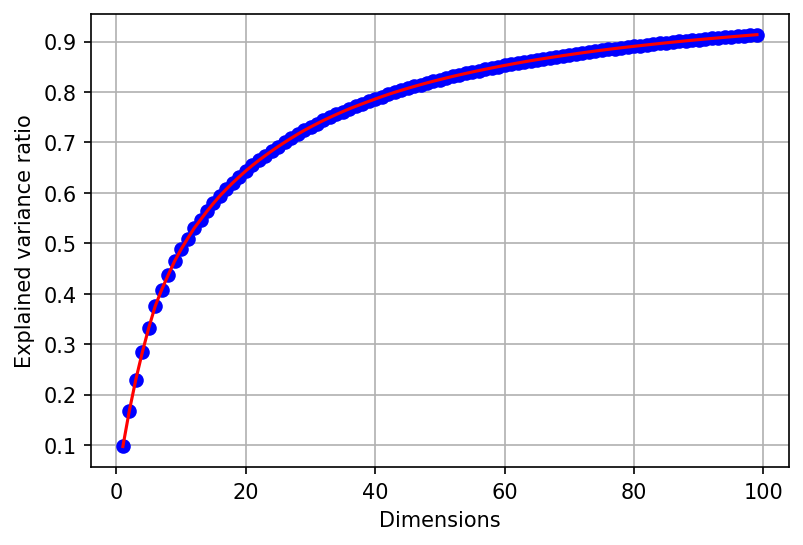

In [ ]:
#Plotting the graph for explained variances by the PCA for a certiain number of dimensions
dim = list(range(1, 100))
var = [sum(pca_test.explained_variance_ratio_[:i]) for i in dim]

plt.figure(dpi=150)
plt.plot(dim, var, 'bo')
plt.plot(dim, var, 'r-')
plt.xlabel('Dimensions')
plt.ylabel('Explained variance ratio')
plt.grid()
plt.show()

In [ ]:
#Training the model with 20 dimensions as it is the sharp turn corner after which, increment in the dimensions does not lead to much of a difference
from sklearn.decomposition import PCA
dim = 45
pca = PCA(n_components=dim, svd_solver='randomized', random_state=42)
pca.fit(trainval_x_flat)

trainval_x_flat = pca.transform(trainval_x_flat)

In [ ]:
#The array is 2-D but the neural network needs 3-D array so converting the data int correct format
trainval_x_flat = [[x] for x in trainval_x_flat]

In [ ]:
#Converting the 3-D array to numpy array
trainval_x_flat = np.array(trainval_x_flat)
trainval_x_flat, trainval_x_flat.shape

(array([[[ 1.23932495e+02, -3.12674011e+02, -2.45175667e+01, ...,
          -4.05510025e+01, -8.38106995e+01, -1.28073242e+02]],
 
        [[ 1.01171838e+03, -2.94858032e+02,  5.96335571e+02, ...,
           6.88298721e+01, -1.65280914e+02, -1.09642448e+01]],
 
        [[-5.18496323e+01,  3.92173462e+02, -1.88506744e+02, ...,
           9.55388489e+01, -9.01542664e-01, -2.29326202e+02]],
 
        ...,
 
        [[-1.78053543e+02,  1.60079193e+02, -2.57616669e+02, ...,
          -2.40360519e+02, -2.62544785e+01, -2.66041222e+01]],
 
        [[ 1.30606049e+02, -5.59315491e+00,  5.13859009e+02, ...,
          -1.92991211e+02, -9.39302750e+01, -9.16066360e+01]],
 
        [[-1.73435974e+02, -2.47198486e+01,  5.56018066e+02, ...,
           8.25288315e+01, -6.81208420e+01,  9.06349869e+01]]],
       dtype=float32), (60000, 1, 45))

In [ ]:
#Creating a validation set from the train dataset
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(trainval_x_flat, trainval_y, test_size = 0.2, random_state = 42)
train_x.shape, val_x.shape, test_x.shape, train_y.shape, val_y.shape, test_y.shape

((48000, 1, 45), (12000, 1, 45), (10000, 28, 28), (48000,), (12000,), (10000,))

###**Model Training**

In [ ]:
#Creating a neural network model with dense layers
nn_model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape = (1, dim)),
    tensorflow.keras.layers.Dense(128, activation='relu'),
    tensorflow.keras.layers.Dense(64, activation='relu'),
    tensorflow.keras.layers.Dense(32, activation='relu'),
    tensorflow.keras.layers.Dense(10)
])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 45)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               5888      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 16,554
Trainable params: 16,554
Non-trainable params: 0
_________________________________________________________________


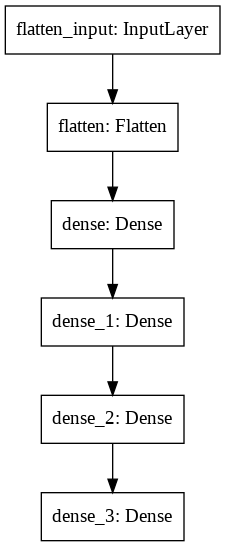

In [ ]:
#Architecture of NN Model
tensorflow.keras.utils.plot_model(nn_model)

In [ ]:
#Compiling the model
nn_model.compile(optimizer='adam', loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics='accuracy')
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 45)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               5888      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 16,554
Trainable params: 16,554
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fitting the model over the data with early stopping and storing the loss and accuracy values
history = nn_model.fit(train_x, train_y,
                       epochs=100, 
                       validation_data=(val_x, val_y), 
                       callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)])

Epoch 1/100
1500/1500 [==============================] - 4s 2ms/step - loss: 7.2959 - accuracy: 0.6578 - val_loss: 0.6023 - val_accuracy: 0.8492
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4751 - accuracy: 0.8794 - val_loss: 0.3537 - val_accuracy: 0.9134
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2790 - accuracy: 0.9226 - val_loss: 0.2856 - val_accuracy: 0.9293
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2097 - accuracy: 0.9422 - val_loss: 0.2067 - val_accuracy: 0.9471
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1588 - accuracy: 0.9550 - val_loss: 0.1778 - val_accuracy: 0.9546
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1305 - accuracy: 0.9620 - val_loss: 0.1771 - val_accuracy: 0.9558
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1089 - accuracy: 0.9686 - val_loss: 0.1519 - val_ac

In [ ]:
#Printing the values loss and accuracy values of train and validation dataset
history.history

{'accuracy': [0.7504166960716248,
  0.8884166479110718,
  0.9249791502952576,
  0.9428541660308838,
  0.9540833234786987,
  0.961187481880188,
  0.9668333530426025,
  0.9703541398048401,
  0.9728541374206543,
  0.9746666550636292,
  0.9775833487510681,
  0.9767083525657654,
  0.9785208106040955,
  0.979895830154419],
 'loss': [2.38405179977417,
  0.4303514361381531,
  0.27723658084869385,
  0.2063763588666916,
  0.15984372794628143,
  0.1333034336566925,
  0.1192716583609581,
  0.10407619923353195,
  0.09707663953304291,
  0.08736298978328705,
  0.07923689484596252,
  0.0817452073097229,
  0.07470669597387314,
  0.07020018249750137],
 'val_accuracy': [0.8491666913032532,
  0.9134166836738586,
  0.9292500019073486,
  0.9470833539962769,
  0.9545833468437195,
  0.9558333158493042,
  0.9607499837875366,
  0.9601666927337646,
  0.9666666388511658,
  0.965416669845581,
  0.9645000100135803,
  0.9645833373069763,
  0.9674999713897705,
  0.9635000228881836],
 'val_loss': [0.6023250222206116,


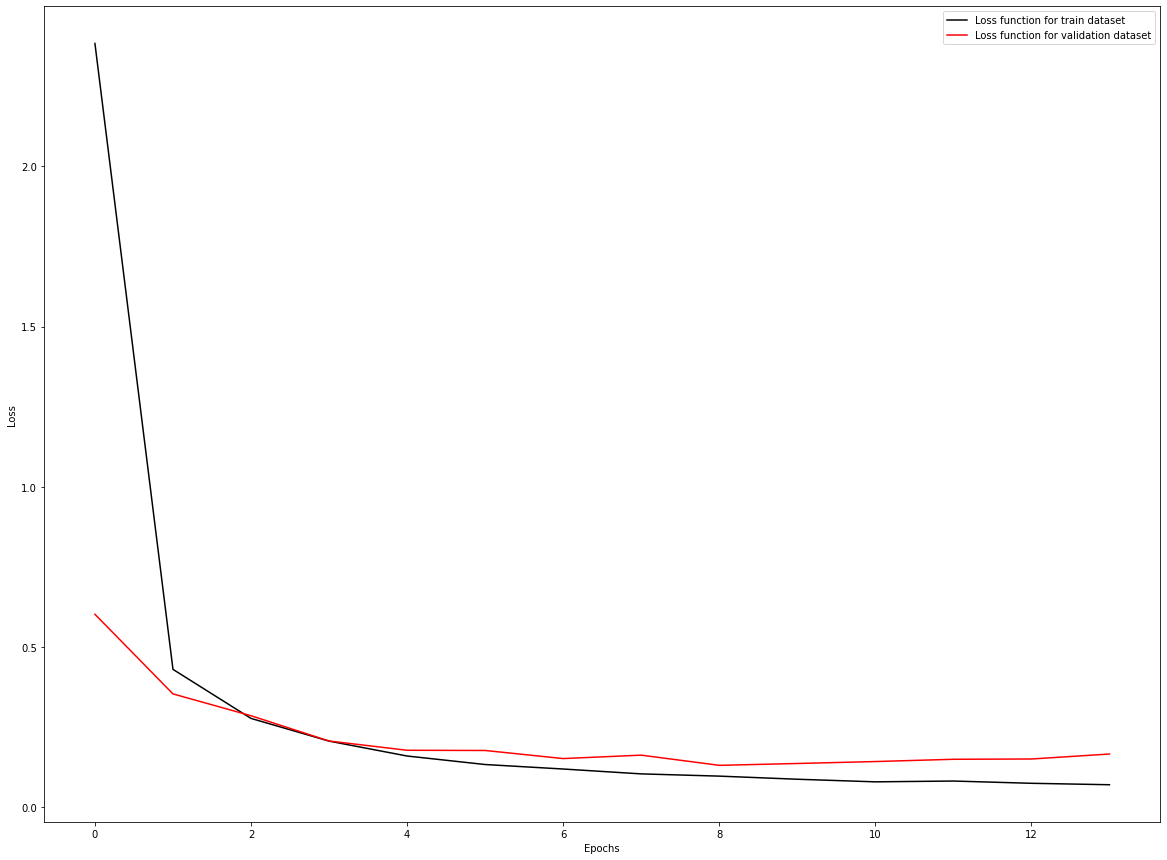

In [ ]:
#Plotting the graph for train loss and validation loss
plt.figure(figsize=(20, 15))
plt.plot(history.history['loss'], 'k-', label = 'Loss function for train dataset')
plt.plot(history.history['val_loss'], 'r-', label = 'Loss function for validation dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Cnverting test images to long vector format
test_x_flat = []
for i in range(len(test_x)):
  test_x_flat.append([y for x in test_x[i] for y in x])

In [ ]:
#Converting list into numpy array
test_x_flat = np.array(test_x_flat)
test_x_flat.shape

(10000, 784)

In [ ]:
#Applying PCA transformation to the test images
test_x_flat = pca.transform(test_x_flat)
test_x_flat.shape

(10000, 45)

In [ ]:
#Converting test data to 3-D list
test_x_flat = [[x] for x in test_x_flat]

In [ ]:
#Converting the list to numpy array format
test_x_flat = np.array(test_x_flat)
test_x_flat, test_x_flat.shape

(array([[[-3.32271149e+02,  7.47799194e+02, -4.28452873e+01, ...,
           1.07641205e+02, -3.27936363e+01, -1.63857559e+02]],
 
        [[ 2.06968994e+01, -9.55584106e+02, -1.52716034e+02, ...,
          -2.18177643e+02,  1.41745056e+02,  6.07857513e+00]],
 
        [[-9.46026794e+02, -4.30843262e+02,  6.61762085e+01, ...,
           7.64191437e+01, -8.36230164e+01,  3.59896545e+01]],
 
        ...,
 
        [[-2.70187622e+02,  5.96869324e+02,  3.55110626e+02, ...,
          -1.67591095e-01, -3.38025589e+01,  2.41439095e+01]],
 
        [[-3.14027222e+02, -1.08604752e+02,  6.42837830e+02, ...,
          -7.01860237e+00,  8.46357956e+01,  5.07471809e+01]],
 
        [[ 1.04238965e+03, -9.05166779e+01,  7.06122131e+02, ...,
          -1.14498367e+02, -1.70312851e+02, -1.96592117e+02]]],
       dtype=float32), (10000, 1, 45))

In [ ]:
#Evaluating the actual model
test_loss, test_accuracy = nn_model.evaluate(test_x_flat, test_y, verbose=2)
test_loss, test_accuracy

313/313 - 1s - loss: 0.1514 - accuracy: 0.9669


(0.15140599012374878, 0.9668999910354614)

###**Making predictions and getting metric values**

In [ ]:
#Making predictions on test dataset
predictions = nn_model.predict(test_x_flat)
pred = np.argmax(predictions, axis=1)
pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
#Create confusion matrix for Custom CNN Model
from sklearn.metrics import confusion_matrix
nn_cm = confusion_matrix(test_y, pred)
nn_cm

array([[ 962,    0,    0,    0,    1,    2,    8,    1,    5,    1],
       [   0, 1127,    4,    1,    0,    0,    3,    0,    0,    0],
       [   5,    0, 1011,    2,    0,    0,    3,    7,    3,    1],
       [   0,    0,   20,  955,    0,   13,    0,    9,    8,    5],
       [   0,    1,    0,    0,  946,    0,    9,    0,    0,   26],
       [   3,    1,    0,    3,    1,  865,    3,    0,    6,   10],
       [   3,    3,    3,    0,    1,    7,  938,    0,    2,    1],
       [   2,   10,   21,    1,    2,    2,    0,  976,    5,    9],
       [   2,    3,   17,    3,    3,    3,   13,    1,  921,    8],
       [   2,    3,    1,    3,   11,    8,    2,    6,    5,  968]])

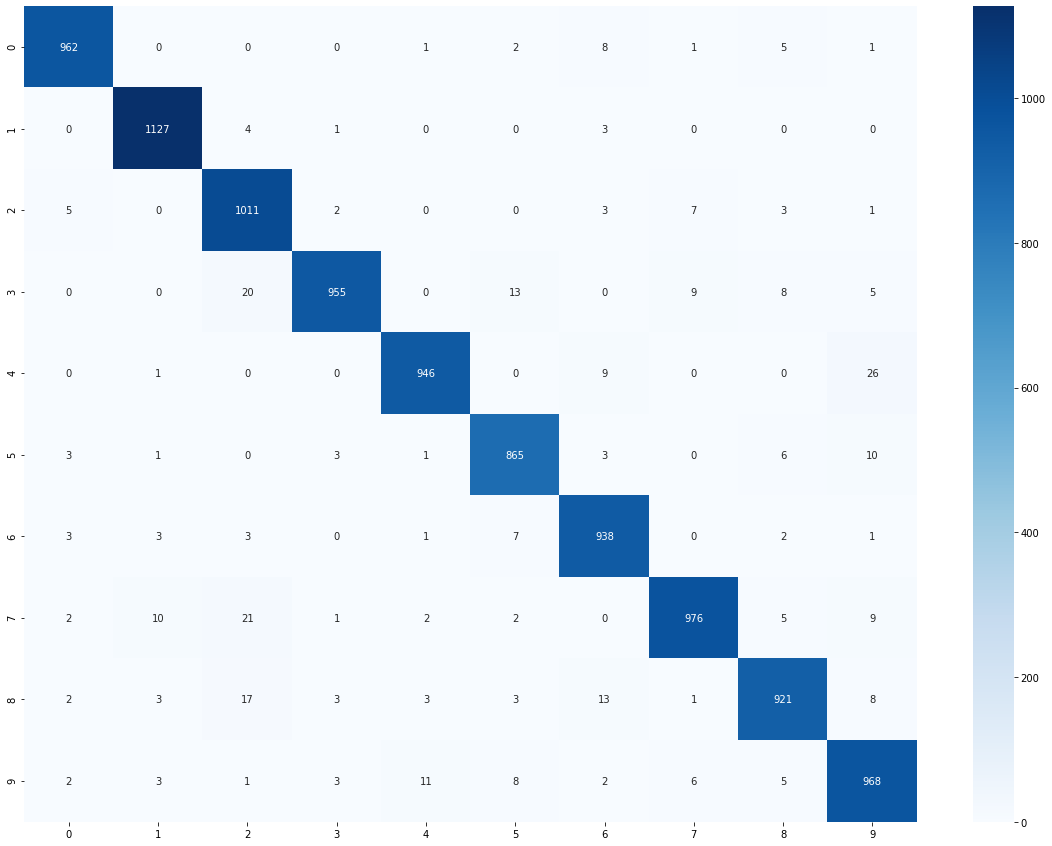

In [ ]:
#Creating a confusion matrix for the predicted output
import seaborn as sns
plt.figure(figsize=(20, 15))
axis = plt.subplot(111)
sns.heatmap(nn_cm, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')

In [ ]:
#Calculating accuracy based in the confusion matrix for Custom CNN Model
#Accuracy is calculated by ratio of all true predictions and total number of images 
#Trace function is used to calculate sum of all diagonal value (True predictions)
nn_accuracy = nn_cm.trace()/nn_cm.sum()
print("Accuracy for NN model : ", nn_accuracy)

Accuracy for NN model :  0.9669


In [ ]:
#Getting F1 micro score for Custom CNN Model
from sklearn.metrics import f1_score
nn_f1 = f1_score(test_y, pred, average = 'micro')
print("F1 score (micro) for NN model : ", nn_f1)

F1 score (micro) for NN model :  0.9669


In [ ]:
#Getting F1 macro score for Custom CNN Model
from sklearn.metrics import f1_score
nn_f1_ma = f1_score(test_y, pred, average = 'macro')
print("F1 score (macro) for NN model : ", nn_f1_ma)

F1 score (macro) for NN model :  0.9666836918215507


In [ ]:
#Converting hte test case labels to one hot vectors
from tensorflow.keras.utils import to_categorical
test_y_preds = to_categorical(test_y)
test_y_preds

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#Converting the model predictions of probability to one hot vectors
from tensorflow.keras.utils import to_categorical
pred_categorical = to_categorical(pred)
pred_categorical

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Calculating AUC Score using one hot vectors of predictions and actual cases
from sklearn.metrics import roc_auc_score
nn_auc = roc_auc_score(test_y_preds, pred_categorical,multi_class='ovr', average = 'macro')
print("AUC Score of NN Model:",nn_auc)

AUC Score of NN Model: 0.9814785891299573


In [ ]:
base_accuracies = pd.read_csv('BaseTable.csv')
pd.set_option('display.max_colwidth', None)
base_accuracies

,Sr. No.,Model,Accuracy based on confusion matrix,F1 Score (micro),F1 Score (macro),AUC Score
0,1,Baseline model trained with input shape of 28*28 flattened at the beginning of the model,0.9682,0.9682,0.967887,0.982254
1,2,Baseline model trained with flatenned input and reduced dimensionality (45 dimensions),0.9669,0.9669,0.966684,0.981479
2,3,Baseline model trained with flatenned input and reduced dimensionality (10 dimensions),0.9191,0.9191,0.917696,0.954331
3,4,Baseline model trained with flatenned input and reduced dimensionality (20 dimensions),0.9637,0.9637,0.963499,0.979652
4,5,Baseline model trained with flatenned input and reduced dimensionality (25 dimensions),0.9639,0.9639,0.963583,0.979752
5,6,Baseline model trained with flatenned input and reduced dimensionality (40 dimensions),0.9651,0.9651,0.964961,0.980483
6,7,Baseline model trained with flatenned input and reduced dimensionality (50 dimensions),0.9668,0.9668,0.966460,0.981330
